# **1. Perkenalan Dataset**


Di notebook ini, kita akan menggunakan **Breast Cancer Wisconsin (Diagnostic) Dataset** dari `sklearn.datasets`.  
Dataset ini berisi 569 sampel dengan 30 fitur numerik (karakteristik sel kanker) serta kolom target “malignant” (0) dan “benign” (1).  

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
#Type your code here# Type your code here
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
data = load_breast_cancer()
df_raw = pd.DataFrame(data.data, columns=data.feature_names)
df_raw['target'] = data.target

df_raw.to_csv("breast_cancer.csv", index=False)
print(f"Dataset mentah berhasil disimpan di: {'breast_cancer.csv'}")

df = pd.read_csv("breast_cancer.csv")
print("5 baris teratas dari dataset mentah:")
display(df.head())

Dataset mentah berhasil disimpan di: breast_cancer.csv
5 baris teratas dari dataset mentah:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Shape dataset: (569, 31)
Jumlah kolom: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-n

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


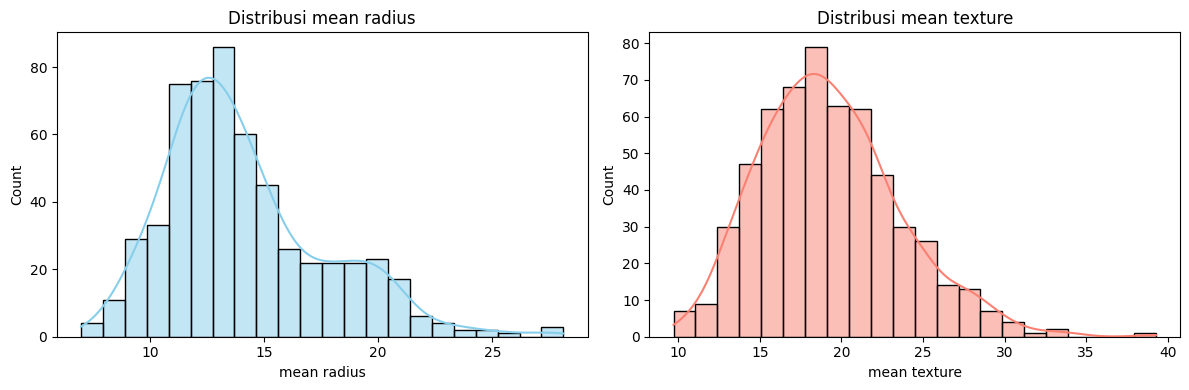

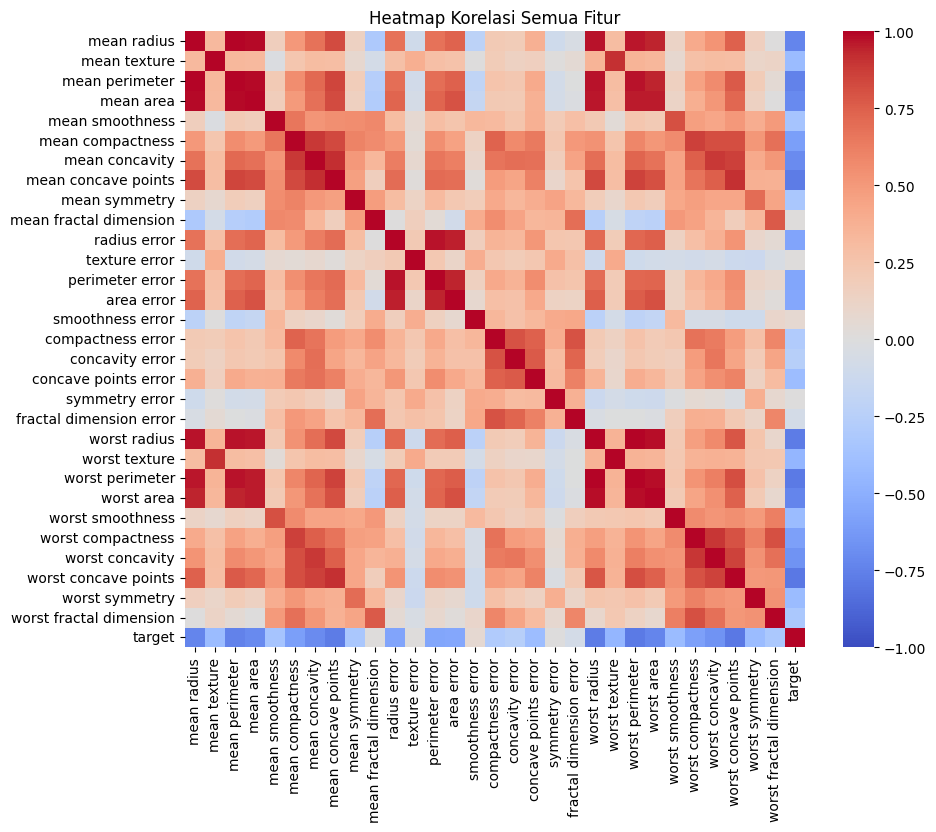

In [7]:
# 1. Ukuran dataset
print("Shape dataset:", df.shape)      # (569, 31)
print("Jumlah kolom:", df.columns.tolist())

# 2. Tipe data dan missing values
print("\nInfo dataset:")
print(df.info())
print("\nTotal missing values per kolom:")
print(df.isna().sum())

# 3. Statistik deskriptif
print("\nStatistik deskriptif (numerik):")
display(df.describe())

# 4. Visualisasi distribusi beberapa fitur (contoh: 'mean radius' dan 'mean texture')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['mean radius'], kde=True, color='skyblue')
plt.title('Distribusi mean radius')

plt.subplot(1, 2, 2)
sns.histplot(df['mean texture'], kde=True, color='salmon')
plt.title('Distribusi mean texture')

plt.tight_layout()
plt.show()

# 5. Heatmap korelasi antar fitur (hanya beberapa kolom untuk kecepatan render)
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, cbar=True)
plt.title("Heatmap Korelasi Semua Fitur")
plt.show()
#Type your code here

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
# Type your code here

# 1. Pisahkan X dan y
X = df.drop(columns=['target'])
y = df['target']

# 2. Split data (stratify supaya proporsi kelas sama di train & test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 4. Buat kembali menjadi DataFrame (supaya mudah disimpan ke CSV)
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df  = pd.DataFrame(X_test_scaled,  columns=X.columns)

# 5. Pastikan folder breast_cancer_preprocessing/ ada (buat di parent folder)
os.makedirs("/breast_cancer_preprocessing", exist_ok=True)

# 6. Simpan CSV hasil preprocessing
X_train_df.to_csv("breast_cancer_preprocessing/X_train.csv", index=False)
X_test_df.to_csv("breast_cancer_preprocessing/X_test.csv", index=False)
y_train.to_csv("breast_cancer_preprocessing/y_train.csv", index=False)
y_test.to_csv("breast_cancer_preprocessing/y_test.csv", index=False)

print("Hasil preprocessing berhasil disimpan di folder breast_cancer_preprocessing/:")
print(os.listdir("breast_cancer_preprocessing"))


Hasil preprocessing berhasil disimpan di folder breast_cancer_preprocessing/:
['X_test.csv', 'X_train.csv', 'y_test.csv', 'y_train.csv']
